# Bayesian Linear Regression

Bayesian is defined as p(x,y) = p(x|y)*p(y)
This is a handy as we can solve for necessary probabilities based on given scenarios.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_regression

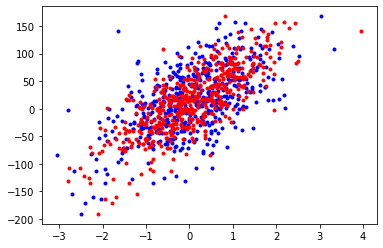

In [7]:
X, y, w= make_regression(n_samples=500, n_features=2, coef=True,
                          random_state=1, bias=10)
lw = 2
plt.scatter(X[:,0], y, color='blue', marker='.', label='Inliers');
plt.scatter(X[:,1], y, color='red', marker='.', label='Inliers');

* Likelihood: p(y|x) is the likelihood of x
* Prior: what we know about x now
* Posterior: what we know of x observed y

* Normalization: scale between 0 and 1
* Standardization: scale mean of 0, std of 1

In [3]:
def calc_posterior(likelihood, prior, norm_list):
    numerator = likelihood * prior
    denominator = sum([x[0]*x[1] for x in norm_list])

    return numerator / denominator

From Bayes, we obtained the posterior probability y, given mean and std. From there 
mu(nought) = X.T*mu
std(nought) = std + X.T*sigma

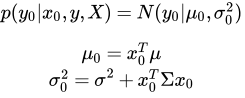

In [9]:
def weights_max_posteriori(aug_x, y, alpha, sigma_squared):
    """
    second param in predict function
    """
    lambda_matrix = alpha * sigma_squared* np.identity(aug_x.shape[1])
    inv = np.linalg.inv(lambda_matrix + np.matmul(aug_x.T, aug_x))
    multiplier = np.matmul(inv , aug_x.T)

    return np.matmul(multiplier, y)

In [10]:
def big_sigma(aug_x, sigma_squared, alpha):
    alpha_matrix = alpha * np.identity(aug_x.shape[1])
    return np.linalg.inv(alpha_matrix+((1/sigma_squared)*np.matmul(aug_x.T, aug_x)))


In [11]:
def bayesian_linear_regression( aug_x, weights, big_sig, sigma_squared):
    """
    3 arrays: aug_x, weights_max_posterior, sq matrix for sigma
    """
    mu_0 = np.matmul(aug_x.T, weights)

    sig_squared_0 = sigma_squared + np.matmul(np.matmul(aug_x.T, big_sig), aug_x)

    return mu_0, sig_squared_0


First param of aug_x is essentially examining the shape of X and transposing X, if row < cols. 